In [1]:
import openmc
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the statepoint file
sp = openmc.StatePoint('../../data/results/statepoint.245.h5')

In [3]:
for t in sp.tallies.values():
    print(t.id, t.name, t.scores)

22 spectral dist. flux ['flux', 'heating', 'nu-fission', 'fission']
23  ['flux', 'heating', 'nu-fission', 'fission']
24 spatial dist. flux ['flux', 'heating', 'nu-fission', 'fission']
25 breeding ratio ['(n,gamma)', 'absorption']
26 IFP time numerator ['ifp-time-numerator']
27 IFP beta numerator ['ifp-beta-numerator']
28 IFP denominator ['ifp-denominator']


## Effective Multiplication Factor

In [4]:
keff = sp.keff

print("k_eff =", keff)
print("k_eff value =", keff.nominal_value)
print("k_eff uncertainty =", keff.std_dev)

k_eff = 1.00113+/-0.00006
k_eff value = 1.001132121221459
k_eff uncertainty = 6.261249127306566e-05


## Breeding Ratio

In [5]:
# breeding ratio calculation
br_tallies = sp.get_tally(name='breeding ratio')
print("Scores:", br_tallies.scores)
print("Nuclides:", br_tallies.nuclides)
print("Filters:", br_tallies.filters)
print("Shape:", br_tallies.mean.shape)

Scores: ['(n,gamma)', 'absorption']
Nuclides: ['Th232', 'U233']
Filters: []
Shape: (1, 2, 2)


In [6]:
ngamma_Th232 = br_tallies.get_values(scores=['(n,gamma)'], nuclides=['Th232'])
abs_U233     = br_tallies.get_values(scores=['absorption'], nuclides=['U233'])

BR = ngamma_Th232 / abs_U233

print("Th-232 (n,gamma) =", ngamma_Th232[0,0,0])
print("U-233 absorption =", abs_U233[0,0,0])
print("Breeding Ratio   =", BR[0,0,0])

Th-232 (n,gamma) = 0.500613462669184
U-233 absorption = 0.44983521631019135
Breeding Ratio   = 1.1128818832271632


## Spatial Distribution of Flux and Fission

### Get Tallies

In [7]:
spatial_dist_tally = sp.get_tally(name='spatial dist. flux')
print(spatial_dist_tally)

Tally
	ID             =	24
	Name           =	spatial dist. flux
	Filters        =	MeshFilter
	Nuclides       =	total
	Scores         =	['flux', 'heating', 'nu-fission', 'fission']
	Estimator      =	tracklength
	Multiply dens. =	True


In [8]:
spatial_dist_tally.sum
print(spatial_dist_tally.mean.shape)

(27000000, 1, 4)


In [9]:

flux = spatial_dist_tally.get_slice(scores=['flux'])
fission = spatial_dist_tally.get_slice(scores=['fission'])
# print(flux)
# print(flux.mean)

### Spatial Neutron Flux Distribution

In [10]:
flux.std_dev.shape = (300, 300, 300)
flux.mean.shape = (300, 300, 300)
fission.std_dev.shape = (300, 300, 300)
fission.mean.shape = (300, 300, 300)

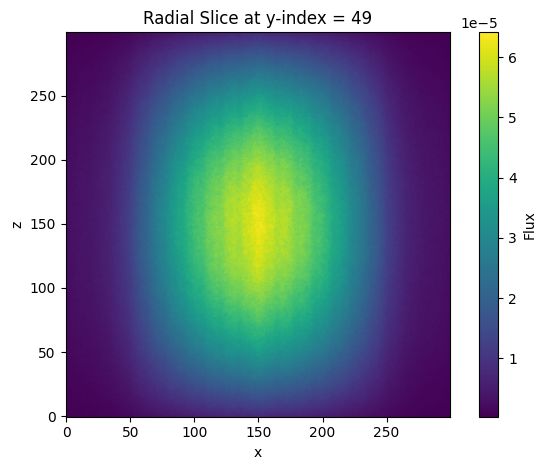

In [11]:
k = 49  # z-index
slice_2d = flux.mean[:, 149, :]  # shape: (nx, ny)

plt.imshow(slice_2d, origin='lower', cmap='viridis')
plt.colorbar(label='Flux')
plt.xlabel('x')
plt.ylabel('z')
plt.title(f'Radial Slice at y-index = {k}')
plt.tight_layout()
plt.show()

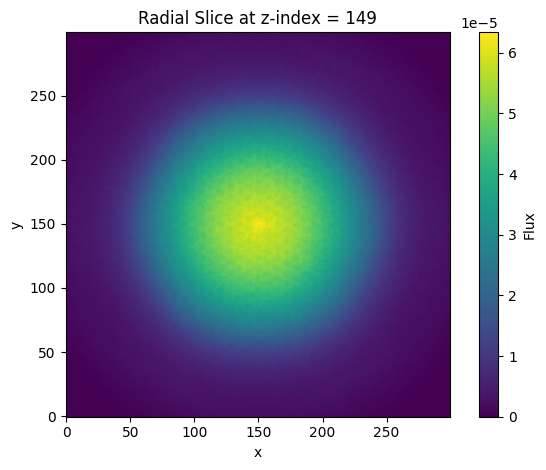

In [12]:
k = 149  # z-index
slice_2d = flux.mean[149, :, :]  # shape: (nx, ny)

plt.imshow(slice_2d, origin='lower', cmap='viridis')
plt.colorbar(label='Flux')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Radial Slice at z-index = {k}')
plt.tight_layout()
plt.show()

In [13]:
mesh = openmc.RegularMesh()
mesh.dimension = [300, 300, 300]
mesh.lower_left = [-230, -230, -230]
mesh.upper_right = [230, 230, 230]

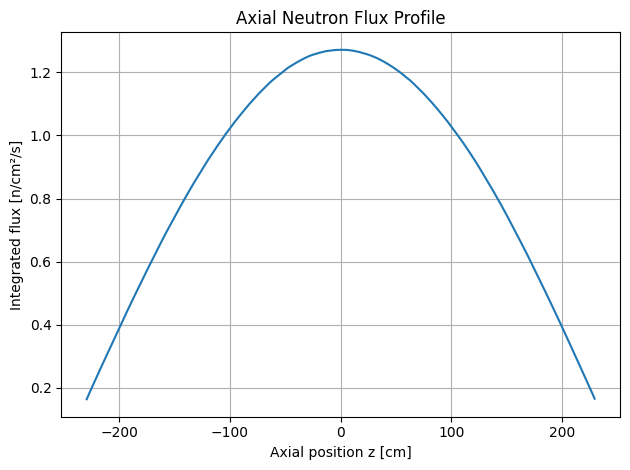

In [26]:
axial_flux = flux.mean.sum(axis=(1,2))

# Get z-centers
z_edges = np.linspace(mesh.lower_left[1], mesh.upper_right[1], mesh.dimension[1] + 1)
z_centers = 0.5 * (z_edges[:-1] + z_edges[1:])

# Plot
plt.plot(z_centers, axial_flux)
plt.xlabel('Axial position z [cm]')
plt.ylabel('Integrated flux [n/cm²/s]')
plt.title('Axial Neutron Flux Profile')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print(flux.mean)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


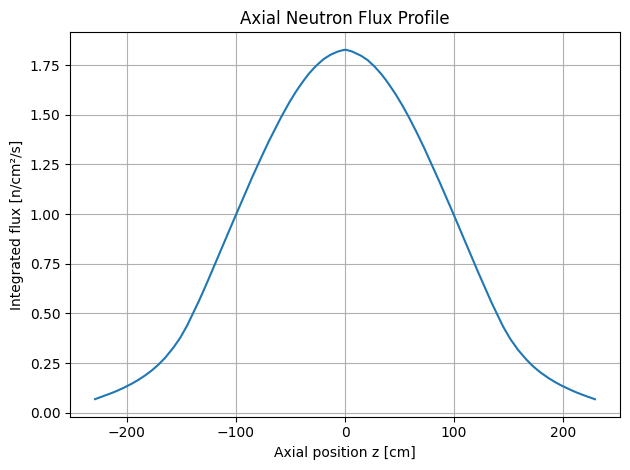

In [23]:
axial_flux = flux.mean.sum(axis=(0,2))

# Get z-centers
z_edges = np.linspace(mesh.lower_left[1], mesh.upper_right[1], mesh.dimension[1] + 1)
z_centers = 0.5 * (z_edges[:-1] + z_edges[1:])

# Plot
plt.plot(z_centers, axial_flux)
plt.xlabel('Axial position z [cm]')
plt.ylabel('Integrated flux [n/cm²/s]')
plt.title('Axial Neutron Flux Profile')
plt.grid(True)
plt.tight_layout()
plt.show()

### Spatial Fission Distribution

In [15]:
# t = sp.get_tally(name='s')
# flux500_mean = t.mean.ravel()
# flux500_unc = t.std_dev.ravel()

In [16]:
# fission.std_dev.shape = (5000, 5000)
# fission.mean.shape = (5000, 5000)
# fig2 = plt.subplot(122)
# fig2.imshow(fission.mean)

# # Example reactor radius (physical radius of the reactor)
# reactor_radius = 320 # meters

# # Create corresponding radius values for the axes
# x_vals = np.linspace(0, reactor_radius, fission.mean.shape[1])
# y_vals = np.linspace(0, reactor_radius, fission.mean.shape[0])

# fig = plt.subplot(121)
# img = fig.imshow(fission.mean, origin='lower')

# # Set the x and y ticks to reflect the reactor's radius
# plt.gca().set_xticks(np.linspace(0, fission.mean.shape[1] - 1, num=6))  # Set 6 ticks along x-axis
# plt.gca().set_yticks(np.linspace(0, fission.mean.shape[0] - 1, num=6))  # Set 6 ticks along y-axis

# # Set the tick labels to correspond to the radius values, without decimals
# plt.gca().set_xticklabels([f"{int(r)}" for r in np.linspace(0, reactor_radius, num=6)])
# plt.gca().set_yticklabels([f"{int(r)}" for r in np.linspace(0, reactor_radius, num=6)])

# plt.show()

### Spectral Neutron Flux Distribution

In [17]:
t = sp.get_tally(name='spectral dist. flux').get_slice(scores=['flux'])
neutron_flux = t.mean.ravel()
flux_unc = t.std_dev.ravel()
print(neutron_flux)

[5.40986301e-08 3.37640808e-08 7.00927595e-08 5.50387874e-08
 7.32898239e-08 1.00645114e-07 1.02344381e-07 1.17778987e-07
 1.46955559e-07 1.88631051e-07 1.31667829e-07 1.60709231e-07
 2.15154824e-07 2.83282913e-07 2.77856611e-07 3.68846937e-07
 2.78982257e-07 3.50555077e-07 4.85928642e-07 7.11062237e-07
 5.99964780e-07 6.91539639e-07 5.34162214e-07 8.75701863e-07
 1.02824141e-06 9.14618166e-07 1.17684863e-06 1.35063310e-06
 1.45129653e-06 1.58120776e-06 2.13425520e-06 1.80567625e-06
 2.05111648e-06 2.65171301e-06 2.79666354e-06 3.44821615e-06
 3.82934513e-06 3.91587087e-06 4.06273203e-06 5.08771142e-06
 5.41055467e-06 6.45263843e-06 6.91230979e-06 8.05532821e-06
 8.64449010e-06 9.62264854e-06 1.09907139e-05 1.28851937e-05
 1.33510792e-05 1.53614041e-05 1.76487218e-05 2.00109887e-05
 2.17225458e-05 2.37716437e-05 2.77608773e-05 3.14985324e-05
 3.39606072e-05 3.86924444e-05 4.36497586e-05 4.64913195e-05
 5.44485193e-05 6.08461481e-05 6.79515721e-05 7.43864040e-05
 8.38249798e-05 9.058297

Text(0, 0.5, 'Flux [n-cm/src]')

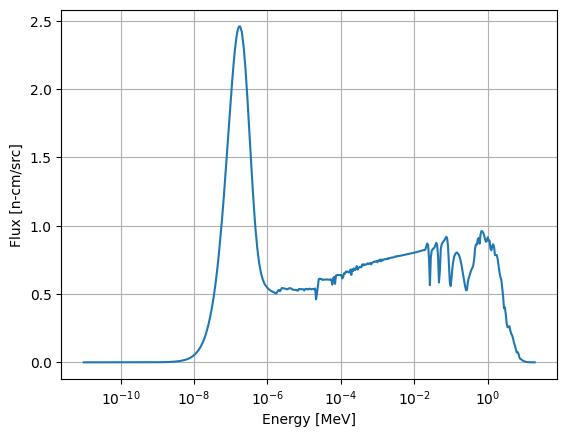

In [18]:
# plt.loglog(energies[:-1], flux) # eV
energies = np.logspace(np.log10(1e-5), np.log10(20.0e6), 501)
plt.semilogx(energies[:-1]/1e6, neutron_flux) # MeV
plt.grid()
plt.xlabel('Energy [MeV]')
plt.ylabel('Flux [n-cm/src]')

71508529.36450355
1.1455666404193467e-11
1.9640935067525743e+20


Text(0, 0.5, 'Flux [neutron/cm2-s]')

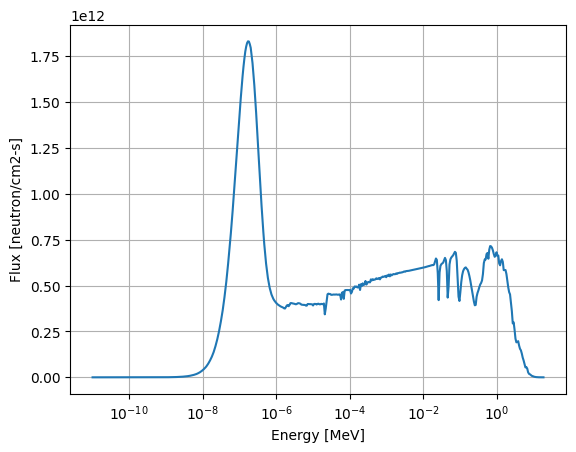

In [19]:
# normalize neutron flux
# heat rate in eV/source
heat = sp.get_tally(id=23).get_slice(scores=['heating'])
print(heat.mean.flatten()[0])

# heat rate in J/source
HeatRate = 1.602e-19 * heat.mean.sum()
print(HeatRate)

# normalization factor (source/s)
power = 2250 * 10**(6) # W
factor = power / HeatRate
print(factor)

# normalized flux
reactor_volume = 263793251.93662 # cm3
normalized_flux = factor * neutron_flux / reactor_volume

# plot
plt.semilogx(energies[:-1]/1e6, normalized_flux) # MeV
plt.grid()
plt.xlabel('Energy [MeV]')
plt.ylabel('Flux [neutron/cm2-s]')

In [20]:
s = sp.get_tally(name='spectral dist. flux')
print(s.scores)
print("flux shape:", neutron_flux.shape)
print("energies shape:", energies.shape)

['flux', 'heating', 'nu-fission', 'fission']
flux shape: (500,)
energies shape: (501,)


1.2773458681897717e-11
1.7614649689113988e+20


Text(0, 0.5, 'Flux [neutron/cm2-s]')

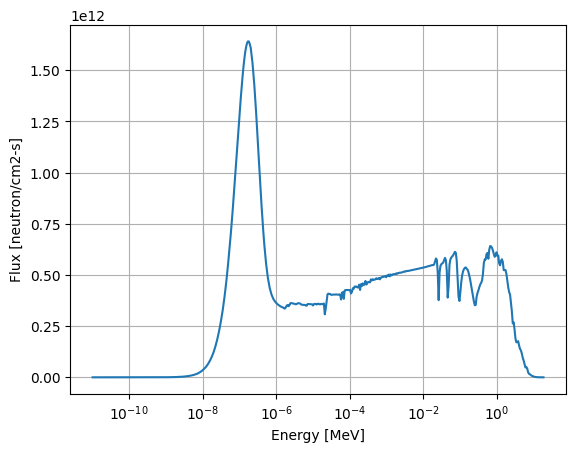

In [21]:
# normalized neutron flux
# neutron per fission tally
nu_fission = sp.get_tally(id=23).get_slice(scores=['nu-fission']) # neutron/fission

# keff
keff = sp.keff.nominal_value
# normalization factor (source/s)
power = 2250 * 10**(6) # W
q_value = 3.171 * 10 ** (-11) # J/fission
fission_rate = sp.get_tally(id=23).get_slice(scores=['fission']) # neutron/fission
heatrates = 1/(nu_fission.mean.sum() / (fission_rate.mean.sum() * q_value * keff))
print(heatrates)

factor = power / heatrates # (J/s)(neutron)/((fission)(J/fission)(neutron/source)) # source/sec
print(factor)

# normalized flux
reactor_volume = 263793251.93662 # cm3
normalized_flux = factor * neutron_flux / reactor_volume # (source/sec)(neutron-cm/source)/(cm3) # neutron/cm2-sec

# flux per unit lethargy
delta_u = np.log(energies[1:501]) - np.log(energies[0:500])
flux_per_unit_lethargy = normalized_flux / delta_u

# plot
plt.semilogx(energies[:-1]/1e6, normalized_flux) # MeV
plt.grid()
plt.xlabel('Energy [MeV]')
plt.ylabel('Flux [neutron/cm2-s]')